In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython.display as ipd
import math


In [38]:
from scipy.io import wavfile

fs, station2 = wavfile.read('altas.wav')
fs, station1 = wavfile.read('baixas.wav')

#Vamos garantir que os dois sinais possuem o mesmo número de amostras

station2 = station2[:100000]
station1 = station1[:100000]

ipd.Audio(station1[:100000],rate=fs)

In [39]:
ipd.Audio(station2[:100000],rate=fs)

In [6]:
fs

44100

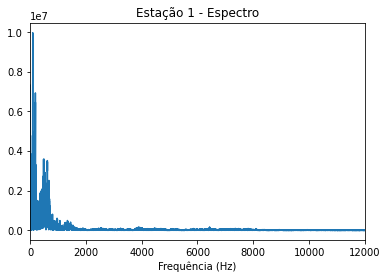

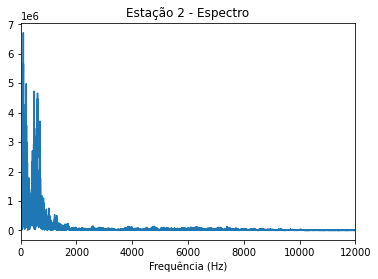

In [8]:
#modulo da transf. de Fourier
S1 = np.fft.fft(station1)
S2 = np.fft.fft(station2)
#frequencias avaliadas
w = np.linspace(0,fs,S1.size)
plt.xlim(0,12000)
plt.plot(w, abs(S1));
plt.xlabel('Frequência (Hz)');
plt.title('Estação 1 - Espectro');

plt.show()
plt.xlim(0,12000)
plt.plot(w, abs(S2));
plt.xlabel('Frequência (Hz)');
plt.title('Estação 2 - Espectro');
plt.show()



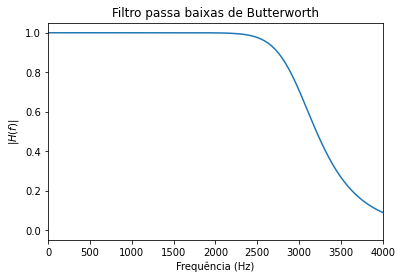

In [9]:
#Projeta o filtro
sos = signal.butter(8, 3000, 'low', fs = fs, output = 'sos')

#Plota a resposta em frequência do filtro
w,h = signal.sosfreqz(sos,fs = fs)
plt.plot(w,np.abs(h));
plt.xlim((0,4000))
plt.xlabel('Frequência (Hz)')
plt.ylabel('$|H(f)|$')
plt.title('Filtro passa baixas de Butterworth');

#Filtra os sinais usando o filtro projetado acima
station2_f = signal.sosfilt(sos,station2)
station1_f = signal.sosfilt(sos,station1)

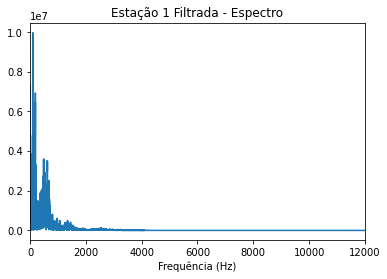

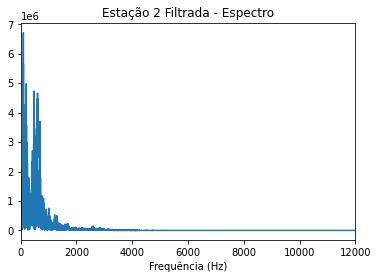

In [10]:
#modulo da transf. de Fourier
S1 = np.fft.fft(station1_f)
S2 = np.fft.fft(station2_f)
#frequencias avaliadas
w = np.linspace(0,fs,S1.size)
plt.xlim(0,12000)
plt.plot(w, abs(S1));
plt.xlabel('Frequência (Hz)');
plt.title('Estação 1 Filtrada - Espectro');

plt.show()
plt.xlim(0,12000)
plt.plot(w, abs(S2));
plt.xlabel('Frequência (Hz)');
plt.title('Estação 2 Filtrada - Espectro');
plt.show()

In [11]:
estacao1_filtrada = np.fft.ifft(S1);
estacao2_filtrada = np.fft.ifft(S2);

In [12]:
ipd.Audio(station1_f[:100000],rate=fs)

In [13]:
ipd.Audio(station2_f[:100000],rate=fs)

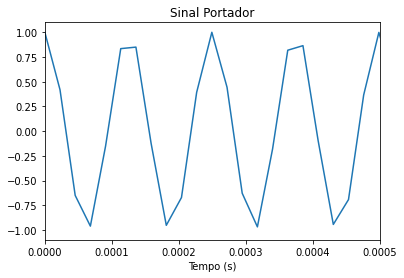

In [14]:
 # frequencia da portadora
 fc = 8000
 t = np.arange(100000)/fs
 sinal_portadora = np.cos(2*np.pi*fc*t)
 plt.xlim(0,0.0005)
 plt.plot(t, sinal_portadora);
 plt.xlabel(r'Tempo (s)');
 plt.title('Sinal Portador');

In [43]:
sinal_modulado = station2_f*sinal_portadora
ipd.Audio(sinal_modulado[:100000],rate=fs)

Text(0.5, 0, 'Frequência (Hz)')

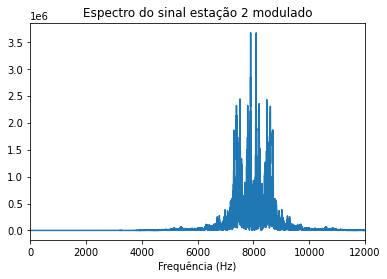

In [44]:
 sinal_modulado_espectro = np.fft.fft(sinal_modulado)
 plt.plot(w, abs(sinal_modulado_espectro))
 plt.xlim(0,12000)
 plt.title('Espectro do sinal estação 2 modulado')
 plt.xlabel('Frequência (Hz)')

In [16]:
#rx = tx
fs, rx = wavfile.read('rx.wav')
ipd.Audio(rx[:100000],rate=fs)

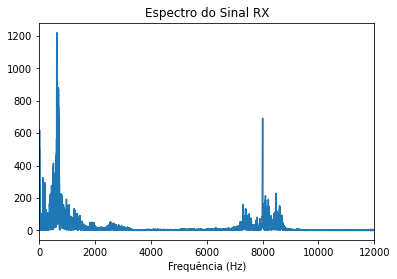

In [17]:
#modulo da transf. de Fourier
rx_freq = np.fft.fft(rx)
#frequencias avaliadas
plt.xlim(0,12000)
plt.plot(w, abs(rx_freq));
plt.xlabel('Frequência (Hz)');
plt.title('Espectro do Sinal RX');


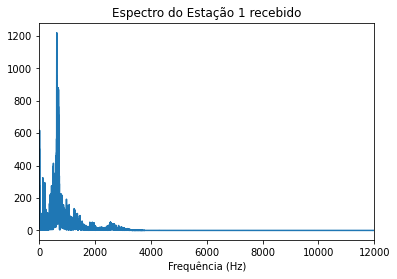

In [18]:
#recuperacao do sinal estacao 1
# filtro passa-baixas
station1_received = signal.sosfilt(sos, rx)
station1_received_freq = np.fft.fft(station1_received)

plt.xlim(0,12000)
plt.plot(w, abs(station1_received_freq));
plt.xlabel('Frequência (Hz)');
plt.title('Espectro do Estação 1 recebido');

In [19]:
station1_received = np.fft.ifft(station1_received_freq)

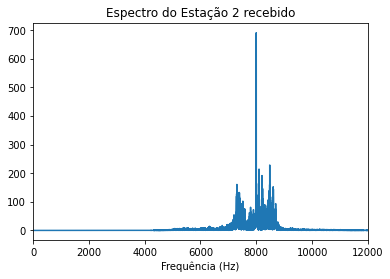

In [24]:
low = 5000
high = 11000
bandpass_filter = signal.butter(8, [low, high], btype='band', fs = fs, output = 'sos')
station2_received = signal.sosfilt(bandpass_filter,rx)
station2_received_freq = np.fft.fft(station2_received)

plt.xlim(0,12000)
plt.plot(w, abs(station2_received_freq));
plt.xlabel('Frequência (Hz)');
plt.title('Espectro do Estação 2 recebido');

Text(0.5, 0, 'Frequência (Hz)')

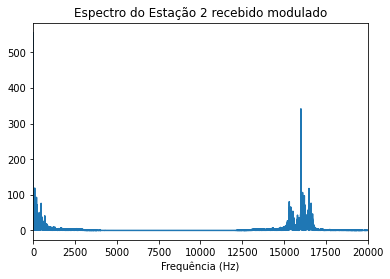

In [41]:
 station2_received_modulado = station2_received*sinal_portadora
 station2_received_modulado_freq = np.fft.fft(station2_received_modulado)
 plt.plot(w, abs(station2_received_modulado_freq))
 plt.xlim(0,20000)
 plt.title('Espectro do Estação 2 recebido modulado')
 plt.xlabel('Frequência (Hz)')

Text(0.5, 0, 'Frequência (Hz)')

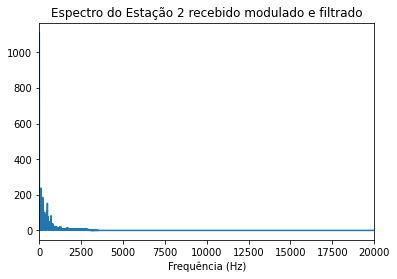

In [45]:
 station2_received_modulado_filtrado = 2*signal.sosfilt(sos, station2_received_modulado)
station2_received_modulado_filtrado_freq = np.fft.fft(station2_received_modulado_filtrado)
 plt.plot(w, abs(station2_received_modulado_filtrado_freq))
 plt.xlim(0,20000)
 plt.title('Espectro do Estação 2 recebido modulado e filtrado')
 plt.xlabel('Frequência (Hz)')

In [46]:
ipd.Audio(station1_received[:100000],rate=fs)

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [47]:
ipd.Audio(station2_received_modulado_filtrado[:100000],rate=fs)